In [16]:
# -*- coding: utf-8 -*-  
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# [batch, in_height, in_width, in_channels] [训练时一个batch的图片数量, 图片高度, 图片宽度, 图像通道数]  
input = tf.Variable(tf.constant(1.0,shape = [1, 5, 5, 1])) 
input2 = tf.Variable(tf.constant(1.0,shape = [1, 5, 5, 2]))
input3 = tf.Variable(tf.constant(1.0,shape = [1, 4, 4, 1])) 

# [filter_height, filter_width, in_channels, out_channels] [卷积核的高度，卷积核的宽度，图像通道数，卷积核个数]   
filter1 =  tf.Variable(tf.constant([-1.0,0,0,-1],shape = [2, 2, 1, 1]))
filter2 =  tf.Variable(tf.constant([-1.0,0,0,-1,-1.0,0,0,-1],shape = [2, 2, 1, 2])) 
filter3 =  tf.Variable(tf.constant([-1.0,0,0,-1,-1.0,0,0,-1,-1.0,0,0,-1],shape = [2, 2, 1, 3])) 
filter4 =  tf.Variable(tf.constant([-1.0,0,0,-1,
                                   -1.0,0,0,-1,
                                   -1.0,0,0,-1,
                                   -1.0,0,0,-1],shape = [2, 2, 2, 2])) 
filter5 =  tf.Variable(tf.constant([-1.0,0,0,-1,-1.0,0,0,-1],shape = [2, 2, 2, 1])) 



# padding的值为‘VALID’，表示边缘不填充, 当其为‘SAME’时，表示填充到卷积核可以到达图像边缘  
op1 = tf.nn.conv2d(input, filter1, strides=[1, 2, 2, 1], padding='SAME') #1个通道输入，生成1个feature ma
op2 = tf.nn.conv2d(input, filter2, strides=[1, 2, 2, 1], padding='SAME') #1个通道输入，生成2个feature map
op3 = tf.nn.conv2d(input, filter3, strides=[1, 2, 2, 1], padding='SAME') #1个通道输入，生成3个feature map

op4 = tf.nn.conv2d(input2, filter4, strides=[1, 2, 2, 1], padding='SAME') # 2个通道输入，生成2个feature
op5 = tf.nn.conv2d(input2, filter5, strides=[1, 2, 2, 1], padding='SAME') # 2个通道输入，生成一个feature map

vop1 = tf.nn.conv2d(input, filter1, strides=[1, 2, 2, 1], padding='VALID') # 5*5 对于pading不同而不同
op6 = tf.nn.conv2d(input3, filter1, strides=[1, 2, 2, 1], padding='SAME') 
vop6 = tf.nn.conv2d(input3, filter1, strides=[1, 2, 2, 1], padding='VALID')  #4*4与pading无关

In [3]:
init = tf.global_variables_initializer()  
with tf.Session() as sess:  
    sess.run(init)  
    
    print("op1:\n",sess.run([op1,filter1]))#1-1  后面补0
    print("------------------")
    
    print("op2:\n",sess.run([op2,filter2])) #1-2多卷积核 按列取
    print("op3:\n",sess.run([op3,filter3])) #1-3
    print("------------------")   
    
    print("op4:\n",sess.run([op4,filter4]))#2-2    通道叠加
    print("op5:\n",sess.run([op5,filter5]))#2-1        
    print("------------------")
  
    print("op1:\n",sess.run([op1,filter1]))#1-1
    print("vop1:\n",sess.run([vop1,filter1]))
    print("op6:\n",sess.run([op6,filter1]))
    print("vop6:\n",sess.run([vop6,filter1]))    

op1:
 [array([[[[-2.],
         [-2.],
         [-1.]],

        [[-2.],
         [-2.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.]]]], dtype=float32), array([[[[-1.]],

        [[ 0.]]],


       [[[ 0.]],

        [[-1.]]]], dtype=float32)]
------------------
op2:
 [array([[[[-2., -2.],
         [-2., -2.],
         [-2.,  0.]],

        [[-2., -2.],
         [-2., -2.],
         [-2.,  0.]],

        [[-1., -1.],
         [-1., -1.],
         [-1.,  0.]]]], dtype=float32), array([[[[-1.,  0.]],

        [[ 0., -1.]]],


       [[[-1.,  0.]],

        [[ 0., -1.]]]], dtype=float32)]
op3:
 [array([[[[-2., -2., -2.],
         [-2., -2., -2.],
         [-1., -1., -1.]],

        [[-2., -2., -2.],
         [-2., -2., -2.],
         [-1., -1., -1.]],

        [[-2., -1.,  0.],
         [-2., -1.,  0.],
         [-1.,  0.,  0.]]]], dtype=float32), array([[[[-1.,  0.,  0.]],

        [[-1., -1.,  0.]]],


       [[[ 0., -1., -1.]],

        [[ 0.,  0., -1.]]]], dtype=f

In [24]:
import matplotlib.image as mpimg

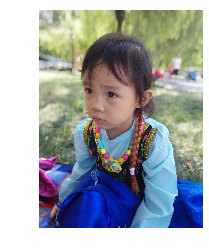

(3264, 2448, 3)


In [28]:
myimg = mpimg.imread('./素材与样本/实例38 素材/img.jpg')
plt.imshow(myimg)
plt.axis('off')
plt.show()
print(myimg.shape)

In [32]:
# full = np.reshape(myimg, [1, 3264, 2448, 3])
full = np.reshape(myimg, [1, *(myimg.shape)])
inputfull = tf.Variable(tf.constant(1.0, shape=[1, *(myimg.shape)]))
filter = tf.Variable(tf.constant([[-1.0, -1.0, -1.0],  [0, 0, 0],  [1.0, 1.0, 1.0],
                                  [-2.0, -2.0, -2.0], [0, 0, 0],  [2.0, 2.0, 2.0],
                                  [-1.0, -1.0, -1.0], [0, 0, 0],  [1.0, 1.0, 1.0]], shape=[3, 3, 3, 1]))
op = tf.nn.conv2d(inputfull, filter, strides=[1, 1, 1, 1], padding='SAME',)
o = tf.cast(((op - tf.reduce_min(op)) /
             (tf.reduce_max(op) - tf.reduce_min(op))) * 255, tf.uint8)

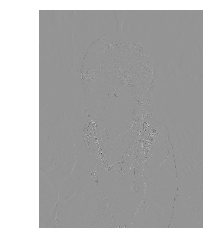

In [42]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    t, f = sess.run([o, filter], feed_dict={inputfull: full})
    t = np.reshape(t, [*myimg.shape][:2])
    plt.imshow(t, cmap='Greys_r')
    plt.axis('off')
    plt.show()

In [37]:
[*myimg.shape][:2]

[3264, 2448]

In [43]:
img = tf.constant([
    [[0.0, 4.0], [0.0, 4.0], [0.0, 4.0], [0.0, 4.0]],
    [[1.0, 5.0], [1.0, 5.0], [1.0, 5.0], [1.0, 5.0]],
    [[2.0, 6.0], [2.0, 6.0], [2.0, 6.0], [2.0, 6.0]],
    [[3.0, 7.0], [3.0, 7.0], [3.0, 7.0], [3.0, 7.0]]
])

img = tf.reshape(img, [1, 4, 4, 2])

pooling = tf.nn.max_pool(img, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
pooling1 = tf.nn.max_pool(img, [1, 2, 2, 1], [1, 1, 1, 1], padding='VALID')
pooling2 = tf.nn.avg_pool(img, [1, 4, 4, 1], [1, 1, 1, 1], padding='SAME')
pooling3 = tf.nn.avg_pool(img, [1, 4, 4, 1], [1, 4, 4, 1], padding='SAME')
nt_hpool2_flat = tf.reshape(tf.transpose(img), [-1, 16])
pooling4 = tf.reduce_mean(nt_hpool2_flat, 1)  # 1对行求均值（1表示轴是列）   0 对列求均值


with tf.Session() as sess:
    print("image:")
    image = sess.run(img)
    print(image)
    result = sess.run(pooling)
    print("reslut:\n", result)
    result = sess.run(pooling1)
    print("reslut1:\n", result)
    result = sess.run(pooling2)
    print("reslut2:\n", result)
    result = sess.run(pooling3)
    print("reslut3:\n", result)
    flat, result = sess.run([nt_hpool2_flat, pooling4])
    print("reslut4:\n", result)
    print("flat:\n", flat)

image:
[[[[0. 4.]
   [0. 4.]
   [0. 4.]
   [0. 4.]]

  [[1. 5.]
   [1. 5.]
   [1. 5.]
   [1. 5.]]

  [[2. 6.]
   [2. 6.]
   [2. 6.]
   [2. 6.]]

  [[3. 7.]
   [3. 7.]
   [3. 7.]
   [3. 7.]]]]
reslut:
 [[[[1. 5.]
   [1. 5.]]

  [[3. 7.]
   [3. 7.]]]]
reslut1:
 [[[[1. 5.]
   [1. 5.]
   [1. 5.]]

  [[2. 6.]
   [2. 6.]
   [2. 6.]]

  [[3. 7.]
   [3. 7.]
   [3. 7.]]]]
reslut2:
 [[[[1.  5. ]
   [1.  5. ]
   [1.  5. ]
   [1.  5. ]]

  [[1.5 5.5]
   [1.5 5.5]
   [1.5 5.5]
   [1.5 5.5]]

  [[2.  6. ]
   [2.  6. ]
   [2.  6. ]
   [2.  6. ]]

  [[2.5 6.5]
   [2.5 6.5]
   [2.5 6.5]
   [2.5 6.5]]]]
reslut3:
 [[[[1.5 5.5]]]]
reslut4:
 [1.5 5.5]
flat:
 [[0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.]
 [4. 5. 6. 7. 4. 5. 6. 7. 4. 5. 6. 7. 4. 5. 6. 7.]]


In [46]:
import sys 
sys.path.append("./素材与样本/实例41 素材/") 

In [50]:
import cifar10_input
import pylab

In [52]:
batch_size = 128
data_dir = './素材与样本/实例41 素材/cifar-10-batches-bin'
images_test, labels_test = cifar10_input.inputs(eval_data=True, data_dir=data_dir, batch_size=batch_size)

In [53]:
images_test.shape, labels_test.shape

(TensorShape([Dimension(128), Dimension(24), Dimension(24), Dimension(3)]),
 TensorShape([Dimension(128)]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


__
 [[[ 1.2483673   0.04940184 -1.4983535 ]
  [ 1.117571    0.02760247 -1.5637516 ]
  [ 1.2483673   0.18019807 -1.411156  ]
  ...
  [-0.60457927 -0.7353755  -0.9097705 ]
  [-0.58277994 -0.8443724  -1.411156  ]
  [-0.1467925  -0.62637866 -1.4547548 ]]

 [[ 1.0739723   0.07120121 -1.4765542 ]
  [ 1.1611698   0.02760247 -1.585551  ]
  [ 1.2047685   0.09300058 -1.5419523 ]
  ...
  [-0.4519837  -0.4519837  -0.56098056]
  [-1.171363   -1.171363   -1.411156  ]
  [-0.9751686  -1.171363   -1.6291498 ]]

 [[ 0.8995773   0.11479995 -1.3893566 ]
  [ 1.2701666   0.13659933 -1.4983535 ]
  [ 1.2265679   0.07120121 -1.5637516 ]
  ...
  [-0.58277994 -0.62637866 -0.7571749 ]
  [-1.0623661  -0.8879711  -0.9315699 ]
  [-1.4329554  -1.411156   -1.585551  ]]

 ...

 [[ 0.35459304  0.79058045  1.2047685 ]
  [ 0.35459304  0.528988    0.6815836 ]
  [ 2.2511382   2.2075396   2.120342  ]
  ...
  [-1.0841655  -0.03779564  0.87777793]
  [-1.0405667  -0.05959501  0.76878107]
  [-1.1495636  -0.08139439  0.81237984]]

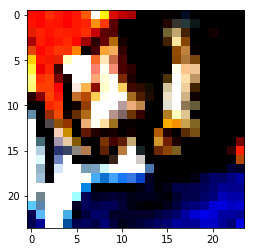

In [58]:
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)
tf.train.start_queue_runners(sess=sess)
image_batch, label_batch = sess.run([images_test, labels_test])
print("__\n",image_batch[0])
print("__\n",label_batch[0])
pylab.imshow(image_batch[0])
pylab.show()

3


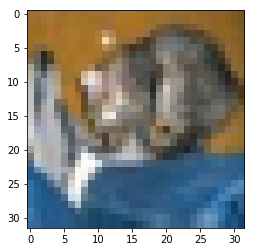

In [60]:
# 手动读取CIFAR
filename = './素材与样本/实例41 素材/cifar-10-batches-bin/test_batch.bin'  

bytestream = open(filename, "rb")  
buf = bytestream.read(10000 * (1 + 32 * 32 * 3))  
bytestream.close()  
  
data = np.frombuffer(buf, dtype=np.uint8)  
data = data.reshape(10000, 1 + 32*32*3)  
labels_images = np.hsplit(data, [1])  
labels = labels_images[0].reshape(10000)  
images = labels_images[1].reshape(10000, 32, 32, 3)  
  
img = np.reshape(images[0], (3, 32, 32)) #导出第一幅图  
img = img.transpose(1, 2, 0)  

print(labels[0]) 
pylab.imshow(img)
pylab.show()